In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import csv
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
import pprint

import nltk
import sklearn
import re  
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
## For Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import os
import seaborn as sns
from textblob import TextBlob
from textblob import Word
plt.style.use('classic')
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# nltk.download('wordnet')

from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import string

from nltk.tokenize import WordPunctTokenizer

from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.cluster import KMeans
from sklearn.base import TransformerMixin
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction import DictVectorizer

from nltk import bigrams
import networkx as nx

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import gensim


from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve 
from sklearn.metrics import average_precision_score
from sklearn.model_selection import KFold 
from sklearn.model_selection import RepeatedKFold
from sklearn import metrics
from sklearn import model_selection

In [123]:
#Importing the TSV Version of the data file
#https://www.kaggle.com/tinoswe/split-python-dataframe
df = pd.read_csv('C:/Users/madmo/OneDrive/Syracuse/IST736 - TextMin/Homework/deception_data_converted_final.tsv', delimiter='\t', sep='utf-8')

In [124]:
df.drop_duplicates('review', inplace=True)
df.head()

,lie,sentiment,review
0,f,n,"'Mike\'s Pizza High Point, NY Service was very..."
1,f,n,'i really like this buffet restaurant in Marsh...
2,f,n,"'After I went shopping with some of my friend,..."
3,f,n,'Olive Oil Garden was very disappointing. I ex...
4,f,n,'The Seven Heaven restaurant was never known f...


In [125]:
df['lie']=np.where(df['lie'] =='f','Truth',df['lie'])
df['lie']=np.where(df['lie'] =='t','Lie',df['lie'])
df['sentiment']=np.where(df['sentiment'] =='n','Negative',df['sentiment'])
df['sentiment']=np.where(df['sentiment'] =='p','Positive',df['sentiment'])

In [126]:
df.describe()

,lie,sentiment,review
count,91,91,91
unique,2,2,91
top,Truth,Negative,"'Usually, I use Yelp to find restaurant. The Y..."
freq,46,46,1


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 0 to 91
Data columns (total 3 columns):
lie          91 non-null object
sentiment    91 non-null object
review       91 non-null object
dtypes: object(3)
memory usage: 2.8+ KB


Frequency of Truth vs Lies


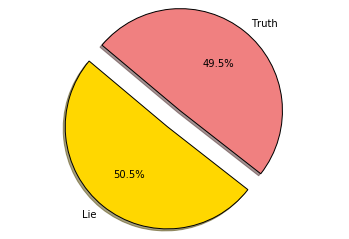

In [128]:
print('Frequency of Truth vs Lies')
tflie = (df['lie']).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tflie.columns = ['words','tf']

Truth = df[df.lie == 'Truth']
Lie = df[df.lie == 'Lie']
# Data to plot
labels = 'Lie', 'Truth'
sizes = [len(Truth), len(Lie)]
colors = ['gold', 'lightcoral']
explode = (0.2, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()


Frequency of Sentiment


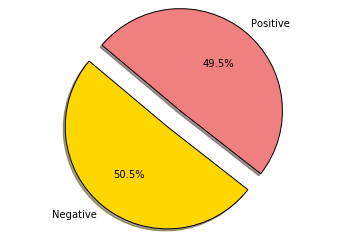

In [129]:
print('Frequency of Sentiment')
tfsent = (df['sentiment']).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tfsent.columns = ['words','tf']

Negative = df[df.sentiment == 'Negative']
Positive = df[df.sentiment == 'Positive']
# Data to plot
labels = 'Negative', 'Positive'
sizes = [len(Truth), len(Lie)]
colors = ['gold', 'lightcoral']
explode = (0.2, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()


In [130]:
df['combo'] = df[['lie', 'sentiment']].apply(lambda x: ''.join(x), axis=1)
df.head()

,lie,sentiment,review,combo
0,Truth,Negative,"'Mike\'s Pizza High Point, NY Service was very...",TruthNegative
1,Truth,Negative,'i really like this buffet restaurant in Marsh...,TruthNegative
2,Truth,Negative,"'After I went shopping with some of my friend,...",TruthNegative
3,Truth,Negative,'Olive Oil Garden was very disappointing. I ex...,TruthNegative
4,Truth,Negative,'The Seven Heaven restaurant was never known f...,TruthNegative


In [131]:
df.tail()

,lie,sentiment,review,combo
87,Lie,Positive,'Pastablities is a locally owned restaurant in...,LiePositive
88,Lie,Positive,'I like the Pizza at Dominoes for their specia...,LiePositive
89,Lie,Positive,'It was a really amazing Japanese restaurant. ...,LiePositive
90,Lie,Positive,'How do I even pick a best experience at Joe\'...,LiePositive
91,Lie,Positive,'My sister and I ate at this restaurant called...,LiePositive


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 0 to 91
Data columns (total 4 columns):
lie          91 non-null object
sentiment    91 non-null object
review       91 non-null object
combo        91 non-null object
dtypes: object(4)
memory usage: 3.6+ KB


Frequency of Combined Lie\Sentiment Values


C:\Users\madmo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



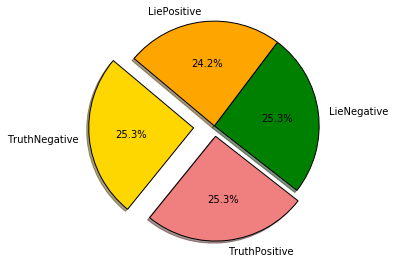

In [133]:
print('Frequency of Combined Lie\Sentiment Values')
tfcombo = (df['combo']).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tfsent.combo = ['words','tf']

TruthNegative = df[df.combo == 'TruthNegative']
TruthPositive = df[df.combo == 'TruthPositive']
LieNegative = df[df.combo == 'LieNegative']
LiePositive = df[df.combo == 'LiePositive']

# Data to plot
labels = 'TruthNegative', 'TruthPositive','LieNegative','LiePositive'
sizes = [len(TruthNegative),len(TruthPositive), len(LieNegative),len(LiePositive)]
colors = ['gold', 'lightcoral','green','orange']
explode = (0.2, 0.1,0.0,0.0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()


In [134]:
# cleaning data
# lower case
df['review'] = df['review'].str.lower()
# remove email adress
df['review'] = df['review'].replace('[a-zA-Z0-9-_.]+@[a-zA-Z0-9-_.]+', '', regex=True)
# remove IP address
df['review'] = df['review'].replace('((25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)(\.|$)){4}', '', regex=True)
# remove punctuation and special characters
df['review'] = df['review'].str.replace('[^\w\s]','')

# remove numbers
df['review'] = df['review'].replace('\d', '', regex=True)

# removing stopwords
stop = stopwords.words('english')
df = df[df['review'].notnull()]
df['review'] = df['review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))


In [135]:
# spelling correction - takes forever!
df['review'] = df['review'].apply(lambda x: str(TextBlob(x).correct()))

In [136]:
print('Cleaned Dataframe')
df.head()

Cleaned Dataframe


,lie,sentiment,review,combo
0,Truth,Negative,miles penza high point ny service slow quality...,TruthNegative
1,Truth,Negative,really like buffets restaurant marshall street...,TruthNegative
2,Truth,Negative,went shopping friend went domo restaurant dinn...,TruthNegative
3,Truth,Negative,olive oil garden disappointing expect good foo...,TruthNegative
4,Truth,Negative,seven heaven restaurant never known superior s...,TruthNegative


In [137]:
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

In [138]:
# removing stopwords
stop = stopwords.words('english')

df['stopwords'] = df['review'].apply(lambda x: len([x for x in x.split() if x in stop]))
df.head()

,lie,sentiment,review,combo,stopwords
0,Truth,Negative,miles penza high point ny service slow quality...,TruthNegative,0
1,Truth,Negative,really like buffets restaurant marshall street...,TruthNegative,0
2,Truth,Negative,went shopping friend went domo restaurant dinn...,TruthNegative,0
3,Truth,Negative,olive oil garden disappointing expect good foo...,TruthNegative,0
4,Truth,Negative,seven heaven restaurant never known superior s...,TruthNegative,0


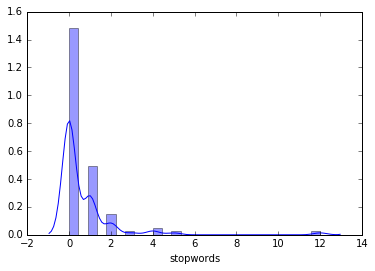

In [139]:
# check for stopwords
sns.distplot(df.stopwords)

C:\Users\madmo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\madmo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars



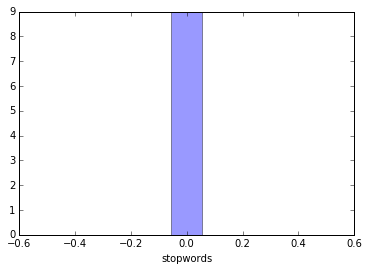

In [140]:
# see if stopwords have been removed
df = df[df['review'].notnull()]
df['review'] = df['review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['stopwords'] = df['review'].apply(lambda x: len([x for x in x.split() if x in stop]))
df.head()
sns.distplot(df.stopwords)

In [141]:
# getting word counts of each review
# after stopword removal
df['word_count'] = df['review'].apply(lambda x: len(str(x).split(" ")))
df.head()

,lie,sentiment,review,combo,stopwords,word_count
0,Truth,Negative,miles penza high point ny service slow quality...,TruthNegative,0,27
1,Truth,Negative,really like buffets restaurant marshall street...,TruthNegative,0,34
2,Truth,Negative,went shopping friend went domo restaurant dinn...,TruthNegative,0,11
3,Truth,Negative,olive oil garden disappointing expect good foo...,TruthNegative,0,23
4,Truth,Negative,seven heaven restaurant never known superior s...,TruthNegative,0,35


Distribution of Number of Words used in Reviews


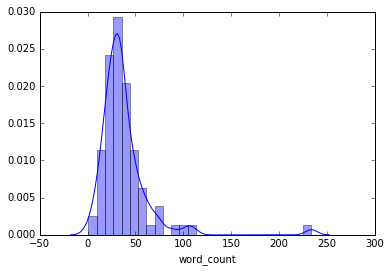

In [142]:
print('Distribution of Number of Words used in Reviews')
sns.distplot(df.word_count)

Words used in reviews


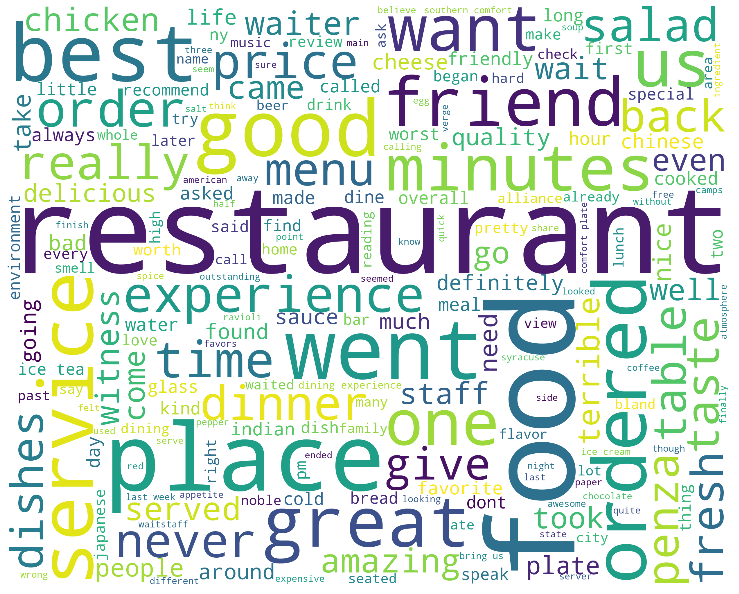

In [143]:
# wordcloud of words used in the reviews
print("Words used in reviews")
wordcloud_draw(df.review,'white')

In [144]:
# most common words
freq = pd.Series(' '.join(df['review']).split()).value_counts()[:15]
freq

restaurant    80
food          80
place         43
went          34
best          31
good          30
service       28
ordered       27
us            25
great         24
would         23
minutes       23
experience    23
like          22
want          20
dtype: int64

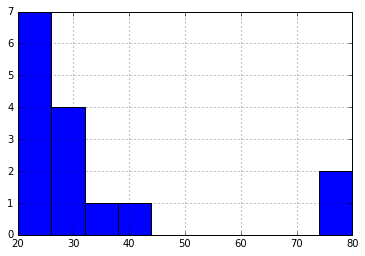

In [145]:
freq.hist()

In [74]:
# remove common words
# will try this with and without common word removal
#freq = pd.Series(' '.join(df['review']).split()).value_counts()[:10]
#freq = list(freq.index)
#df['review'] = df['review'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

In [146]:
# least common words
freq2 = pd.Series(' '.join(df['review']).split()).value_counts()[-10:]
freq2

enter        1
daily        1
soooooooo    1
wasting      1
search       1
dog          1
dinners      1
baker        1
processes    1
pizzas       1
dtype: int64

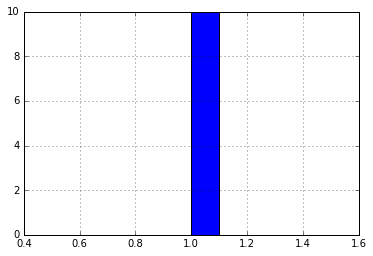

In [147]:
freq2.hist()

In [77]:
# remove rare words
# will try this with and without rare word removal
#freqa = pd.Series(' '.join(df['review']).split()).value_counts()[-10:]
#freqa = list(freqa.index)
#df['review'] = df['review'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

In [148]:
# remove common and rare words in a separate dataframe
freq = list(freq.index)
freq2 = list(freq2.index)
dfrem = df
dfrem['review'] = dfrem['review'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
dfrem['review'] = dfrem['review'].apply(lambda x: " ".join(x for x in x.split() if x not in freq2))
dfrem['review'].head()

0    miles penza high point ny slow quality low thi...
1    really buffets marshall street lot selection a...
2    shopping friend domo dinner found worm one dishes
3    olive oil garden disappointing expect least go...
4    seven heaven never known superior experienced ...
Name: review, dtype: object

In [149]:
# converting words to root words
print('Lemmatizing Data with Common and Rare Words')
df['review'] = df['review'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['review'].head()

Lemmatizing Data with Common and Rare Words


0    mile penza high point ny slow quality low thin...
1    really buffet marshall street lot selection am...
2      shopping friend domo dinner found worm one dish
3    olive oil garden disappointing expect least go...
4    seven heaven never known superior experienced ...
Name: review, dtype: object

In [150]:
# converting words to root words
print('Lemmatizing Data without Common and Rare Words')
dfrem['review'] = dfrem['review'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
dfrem['review'].head()

Lemmatizing Data without Common and Rare Words


0    mile penza high point ny slow quality low thin...
1    really buffet marshall street lot selection am...
2      shopping friend domo dinner found worm one dish
3    olive oil garden disappointing expect least go...
4    seven heaven never known superior experienced ...
Name: review, dtype: object

In [151]:
dfliepred = df[['lie','review']]
dfsenpred = df[['sentiment','review']]
dfcompred = df[['combo','review']]

In [152]:
dfliepred.head()

,lie,review
0,Truth,mile penza high point ny slow quality low thin...
1,Truth,really buffet marshall street lot selection am...
2,Truth,shopping friend domo dinner found worm one dish
3,Truth,olive oil garden disappointing expect least go...
4,Truth,seven heaven never known superior experienced ...


In [153]:
dfsenpred.head()

,sentiment,review
0,Negative,mile penza high point ny slow quality low thin...
1,Negative,really buffet marshall street lot selection am...
2,Negative,shopping friend domo dinner found worm one dish
3,Negative,olive oil garden disappointing expect least go...
4,Negative,seven heaven never known superior experienced ...


In [154]:
dfcompred.head()

,combo,review
0,TruthNegative,mile penza high point ny slow quality low thin...
1,TruthNegative,really buffet marshall street lot selection am...
2,TruthNegative,shopping friend domo dinner found worm one dish
3,TruthNegative,olive oil garden disappointing expect least go...
4,TruthNegative,seven heaven never known superior experienced ...


In [155]:
print('#########################################################################')
print('################################## MODELS ###############################')
print('#########################################################################')

#########################################################################
################################## MODELS ###############################
#########################################################################


In [156]:
print('Multinomial Naive Bayes')

Multinomial Naive Bayes


In [157]:
print('With Common and Rare Words')

Without Common and Rare Words


In [91]:
# dfliepred['review'] = dfliepred['review'].apply(nltk.word_tokenize)

In [158]:
#https://www.kaggle.com/vignesht/classifying-news-headlines-with-scikit-learn

# vectorize
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(dfliepred['review'])

In [159]:
encoder = LabelEncoder()
y = encoder.fit_transform(dfliepred['lie'])

In [160]:
# split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, shuffle=True)

In [161]:
# take a look at the shape of each of these
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(81, 1196)
(81,)
(10, 1196)
(10,)


In [162]:
nb = MultinomialNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)

In [163]:
nb.score(x_test, y_test)

0.7

In [164]:
print(accuracy_score(y_test, y_pred))

0.7


In [165]:
coefs = nb.coef_
print(coefs.shape)
print(coefs)

(1, 1196)
[[-7.15148546 -7.84463264 -7.84463264 ... -6.45833828 -7.15148546
  -6.74602036]]


In [166]:
def make_reverse_vocabulary(vectorizer):
    revvoc = {}

    vocab = vectorizer.vocabulary_
    for w in vocab:
        i = vocab[w]

        revvoc[i] = w

    return revvoc

In [167]:
#https://medium.com/hugo-ferreiras-blog/confusion-matrix-and-other-metrics-in-machine-learning-894688cb1c0a
print(confusion_matrix(y_test,y_pred))


[[3 2]
 [1 4]]


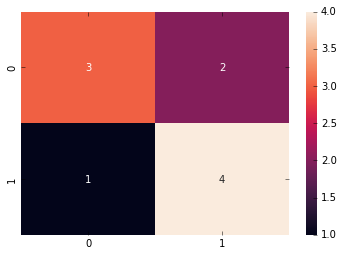

In [168]:
##https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
cmtrx = confusion_matrix(y_test,y_pred)
sns.heatmap(cmtrx, annot=True)

In [169]:
y_pred_prob = nb.predict_proba(x_test)[:,1]

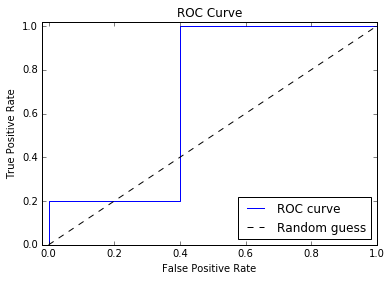

In [170]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

In [171]:
roc_auc_score(y_test, y_pred_prob)

0.6799999999999999

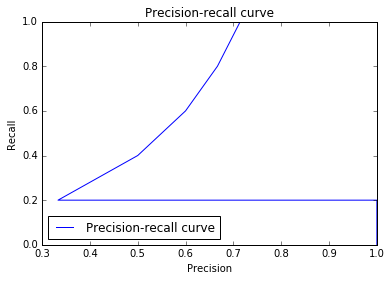

In [172]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
# create plot
plt.plot(precision, recall, label='Precision-recall curve')
_ = plt.xlabel('Precision')
_ = plt.ylabel('Recall')
_ = plt.title('Precision-recall curve')
_ = plt.legend(loc="lower left")

In [173]:
average_precision_score(y_test, y_pred_prob)

0.6961904761904762

In [174]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.67      0.80      0.73         5

    accuracy                           0.70        10
   macro avg       0.71      0.70      0.70        10
weighted avg       0.71      0.70      0.70        10



In [175]:
print('Bernoulli Naive Bayes')

Bernoulli Naive Bayes


In [176]:
# vectorize
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(dfliepred['review'])
encoder = LabelEncoder()
y = encoder.fit_transform(dfliepred['lie'])
# split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, shuffle=True)
# take a look at the shape of each of these
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(81, 1196)
(81,)
(10, 1196)
(10,)


In [177]:
nb = BernoulliNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)

In [178]:
nb.score(x_test, y_test)

0.4

In [179]:
print(accuracy_score(y_test, y_pred))

0.4


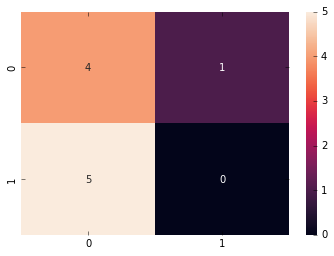

In [180]:
cmtrx = confusion_matrix(y_test,y_pred)
sns.heatmap(cmtrx, annot=True)

In [181]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.44      0.80      0.57         5
           1       0.00      0.00      0.00         5

    accuracy                           0.40        10
   macro avg       0.22      0.40      0.29        10
weighted avg       0.22      0.40      0.29        10



In [182]:
print('#########################################################################')
print('################## Without Common and Rare Words Included ##################')
print('#########################################################################')

#########################################################################
################## Without Common and Rare Words Included ##################
#########################################################################


In [183]:
print('Without Common and Rare Words')

Without Common and Rare Words


In [184]:
dfrem = dfrem[['lie','review']]
dfrem.head()

,lie,review
0,Truth,mile penza high point ny slow quality low thin...
1,Truth,really buffet marshall street lot selection am...
2,Truth,shopping friend domo dinner found worm one dish
3,Truth,olive oil garden disappointing expect least go...
4,Truth,seven heaven never known superior experienced ...


In [185]:
# vectorize
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(dfrem['review'])
encoder = LabelEncoder()
y = encoder.fit_transform(dfrem['lie'])
# split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, shuffle=True)
# take a look at the shape of each of these
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(81, 1196)
(81,)
(10, 1196)
(10,)


In [186]:
nb = MultinomialNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)
nb.score(x_test, y_test)

0.3

In [187]:
print(confusion_matrix(y_test,y_pred))

[[1 2]
 [5 2]]


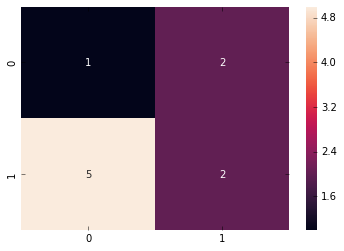

In [188]:
cmtrx = confusion_matrix(y_test,y_pred)
sns.heatmap(cmtrx, annot=True)

In [189]:
print('Bernoulli NB')

Bernoulli NB


In [190]:
# vectorize
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(dfrem['review'])
encoder = LabelEncoder()
y = encoder.fit_transform(dfrem['lie'])
# split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, shuffle=True)
# take a look at the shape of each of these
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(81, 1196)
(81,)
(10, 1196)
(10,)


In [191]:
nb = BernoulliNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)
nb.score(x_test, y_test)

0.5

In [192]:
print(confusion_matrix(y_test,y_pred))

[[3 2]
 [3 2]]


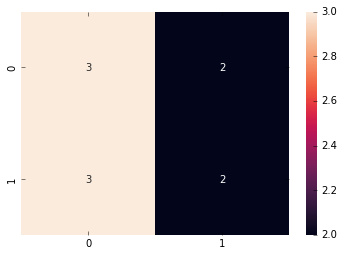

In [193]:
cmtrx = confusion_matrix(y_test,y_pred)
sns.heatmap(cmtrx, annot=True)

In [194]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.60      0.55         5
           1       0.50      0.40      0.44         5

    accuracy                           0.50        10
   macro avg       0.50      0.50      0.49        10
weighted avg       0.50      0.50      0.49        10



In [195]:
print('#########################################################################')
print('######################### Predicting Sentiment ##########################')
print('#########################################################################')

#########################################################################
######################### Predicting Sentiment ##########################
#########################################################################


In [196]:
print('Predicting Sentiment')

Predicting Sentiment


In [197]:
dfsenpred2 = dfsenpred[['sentiment','review']]
dfsenpred2.head()

,sentiment,review
0,Negative,mile penza high point ny slow quality low thin...
1,Negative,really buffet marshall street lot selection am...
2,Negative,shopping friend domo dinner found worm one dish
3,Negative,olive oil garden disappointing expect least go...
4,Negative,seven heaven never known superior experienced ...


In [198]:
# vectorize
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(dfsenpred2['review'])
encoder = LabelEncoder()
y = encoder.fit_transform(dfsenpred2['sentiment'])
# split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, shuffle=True)
# take a look at the shape of each of these
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(81, 1196)
(81,)
(10, 1196)
(10,)


In [199]:
nb = MultinomialNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)
nb.score(x_test, y_test)

0.6

In [200]:
print(confusion_matrix(y_test,y_pred))

[[3 2]
 [2 3]]


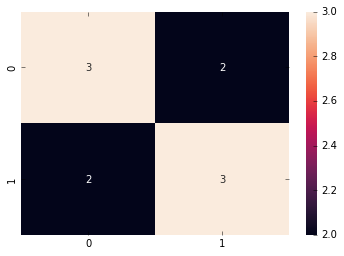

In [201]:
cmtrx = confusion_matrix(y_test,y_pred)
sns.heatmap(cmtrx, annot=True)

In [202]:
y_pred_prob = nb.predict_proba(x_test)[:,1]

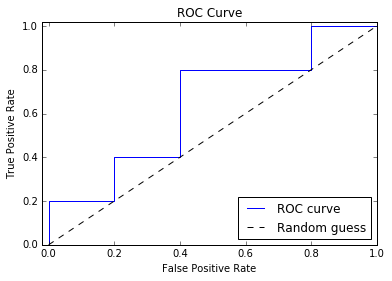

In [203]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

In [204]:
roc_auc_score(y_test, y_pred_prob)

0.64

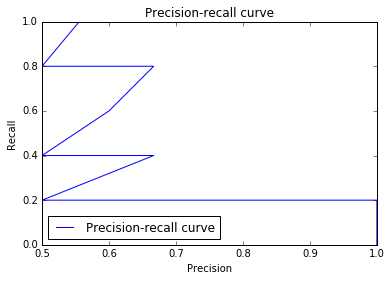

In [205]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
# create plot
plt.plot(precision, recall, label='Precision-recall curve')
_ = plt.xlabel('Precision')
_ = plt.ylabel('Recall')
_ = plt.title('Precision-recall curve')
_ = plt.legend(loc="lower left")

In [206]:
average_precision_score(y_test, y_pred_prob)

0.6977777777777778

In [207]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.60      0.60      0.60         5

    accuracy                           0.60        10
   macro avg       0.60      0.60      0.60        10
weighted avg       0.60      0.60      0.60        10



In [208]:
print('Bernoulli Naive Bayes')

Bernoulli Naive Bayes


In [209]:
# vectorize
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(dfsenpred2['review'])
encoder = LabelEncoder()
y = encoder.fit_transform(dfsenpred2['sentiment'])
# split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, shuffle=True)
# take a look at the shape of each of these
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(81, 1196)
(81,)
(10, 1196)
(10,)


In [210]:
nb = BernoulliNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)
nb.score(x_test, y_test)

0.8

[[5 2]
 [0 3]]


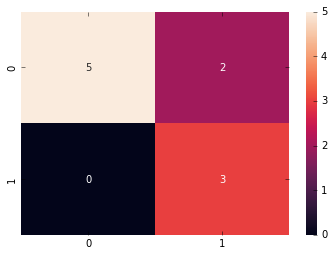

In [211]:
print(confusion_matrix(y_test,y_pred))
cmtrx = confusion_matrix(y_test,y_pred)
sns.heatmap(cmtrx, annot=True)

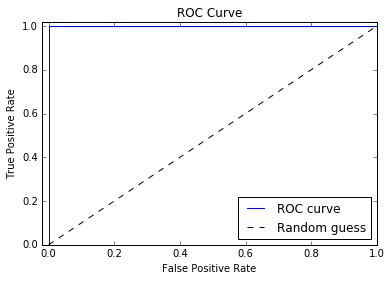

In [212]:
y_pred_prob = nb.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

In [213]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.60      1.00      0.75         3

    accuracy                           0.80        10
   macro avg       0.80      0.86      0.79        10
weighted avg       0.88      0.80      0.81        10



In [214]:
print('Predicting Sentiment without Common and Rare words')

Predicting Sentiment without Common and Rare words


In [215]:
dfrem2 = df
dfrem2['review'] = dfrem2['review'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
dfrem2['review'] = dfrem2['review'].apply(lambda x: " ".join(x for x in x.split() if x not in freq2))
dfrem2['review'] = dfrem2['review'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
dfrem2['review'].head()


0    mile penza high point ny slow quality low thin...
1    really buffet marshall street lot selection am...
2      shopping friend domo dinner found worm one dish
3    olive oil garden disappointing expect least go...
4    seven heaven never known superior experienced ...
Name: review, dtype: object

In [216]:
dfrem2 = dfrem2[['sentiment','review']]

In [217]:
# vectorize
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(dfrem2['review'])
encoder = LabelEncoder()
y = encoder.fit_transform(dfrem2['sentiment'])
# split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, shuffle=True)
# take a look at the shape of each of these
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(81, 1194)
(81,)
(10, 1194)
(10,)


In [218]:
nb = MultinomialNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)
nb.score(x_test, y_test)

0.8

In [219]:
print(confusion_matrix(y_test,y_pred))

[[2 2]
 [0 6]]


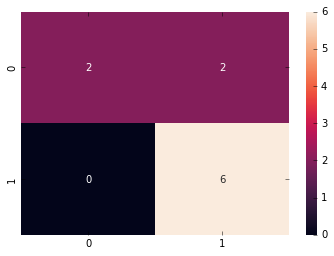

In [220]:
cmtrx = confusion_matrix(y_test,y_pred)
sns.heatmap(cmtrx, annot=True)

In [221]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.75      1.00      0.86         6

    accuracy                           0.80        10
   macro avg       0.88      0.75      0.76        10
weighted avg       0.85      0.80      0.78        10



In [222]:
print('Bernoulli Naive Bayes')

Bernoulli Naive Bayes


In [223]:
# vectorize
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(dfrem2['review'])
encoder = LabelEncoder()
y = encoder.fit_transform(dfrem2['sentiment'])
# split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, shuffle=True)
# take a look at the shape of each of these
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(81, 1194)
(81,)
(10, 1194)
(10,)


In [224]:
nb = BernoulliNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)
nb.score(x_test, y_test)

0.8

[[5 2]
 [0 3]]


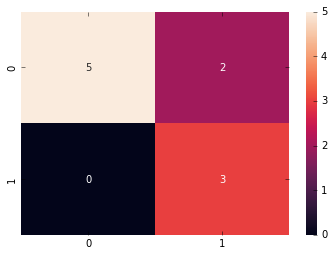

In [225]:
print(confusion_matrix(y_test,y_pred))
cmtrx = confusion_matrix(y_test,y_pred)
sns.heatmap(cmtrx, annot=True)

In [226]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.60      1.00      0.75         3

    accuracy                           0.80        10
   macro avg       0.80      0.86      0.79        10
weighted avg       0.88      0.80      0.81        10



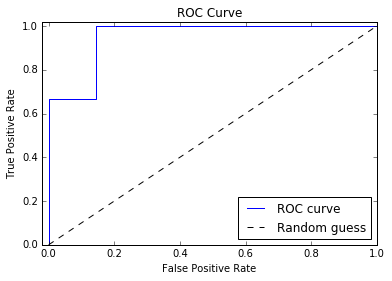

In [227]:
y_pred_prob = nb.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

In [228]:
## Term Frequency
tf1 = (dfsenpred2['review']).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1 = tf1.sort_values(by=['tf'], ascending=False)
tf1.head()

,words,tf
52,friend,22.0
12,dish,21.0
49,one,20.0
78,time,18.0
97,order,18.0


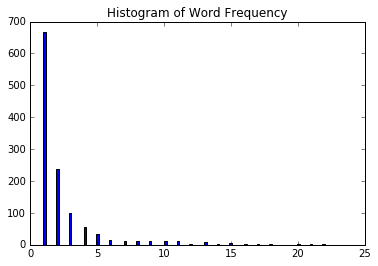

In [229]:
plt.hist(tf1.tf, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram of Word Frequency")
plt.show()

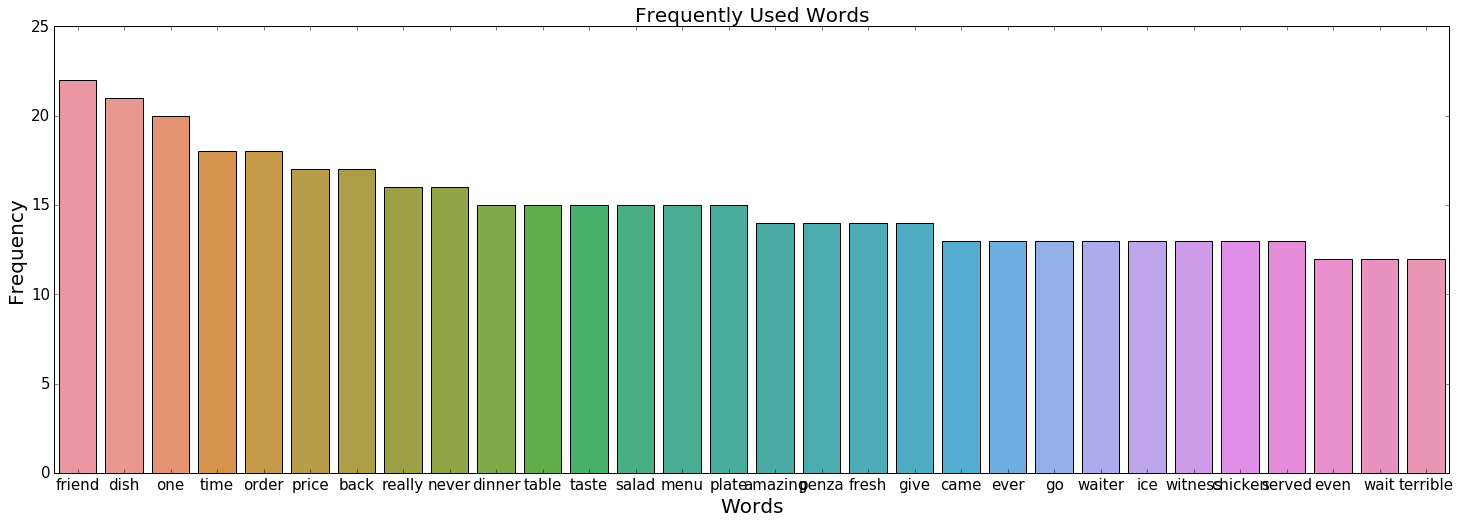

In [230]:
tf1tops = tf1[tf1['tf'] >=12]
plt.figure(figsize=(25,8))
b=sns.barplot(x='words',y='tf',data=tf1tops)
b.axes.set_title("Frequently Used Words",fontsize=20)
b.set_xlabel("Words",fontsize=20)
b.set_ylabel("Frequency",fontsize=20)
b.tick_params(labelsize=15)


In [231]:
print('Predicting Sentiment and Truth')

Predicting Sentiment and Truth


In [232]:
dfcompred = dfcompred[['combo','review']]
dfcompred.head()

,combo,review
0,TruthNegative,mile penza high point ny slow quality low thin...
1,TruthNegative,really buffet marshall street lot selection am...
2,TruthNegative,shopping friend domo dinner found worm one dish
3,TruthNegative,olive oil garden disappointing expect least go...
4,TruthNegative,seven heaven never known superior experienced ...


In [233]:
# vectorize
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(dfcompred['review'])
encoder = LabelEncoder()
y = encoder.fit_transform(dfcompred['combo'])
# split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, shuffle=True)
# take a look at the shape of each of these
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(81, 1196)
(81,)
(10, 1196)
(10,)


In [234]:
nb = MultinomialNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)
nb.score(x_test, y_test)

0.3

In [235]:
print(confusion_matrix(y_test,y_pred))

[[0 1 2 0]
 [0 0 0 0]
 [1 0 2 0]
 [0 3 0 1]]


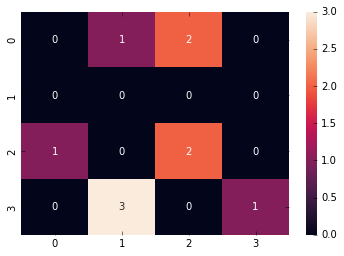

In [236]:
cmtrx = confusion_matrix(y_test,y_pred)
sns.heatmap(cmtrx, annot=True)

In [237]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         0
           2       0.50      0.67      0.57         3
           3       1.00      0.25      0.40         4

    accuracy                           0.30        10
   macro avg       0.38      0.23      0.24        10
weighted avg       0.55      0.30      0.33        10



C:\Users\madmo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.



In [238]:
print('Predicting Sentiment and Truth - Bernoulli')

Predicting Sentiment and Truth - Bernoulli


In [239]:
# vectorize
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(dfcompred['review'])
encoder = LabelEncoder()
y = encoder.fit_transform(dfcompred['combo'])
# split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, shuffle=True)
# take a look at the shape of each of these
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(81, 1196)
(81,)
(10, 1196)
(10,)


In [240]:
nb = BernoulliNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)
nb.score(x_test, y_test)

0.1

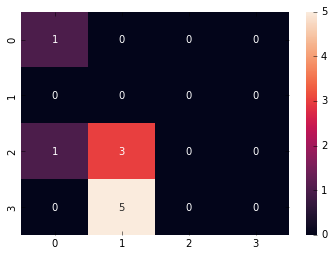

In [241]:
cmtrx = confusion_matrix(y_test,y_pred)
sns.heatmap(cmtrx, annot=True)

In [242]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         5

    accuracy                           0.10        10
   macro avg       0.12      0.25      0.17        10
weighted avg       0.05      0.10      0.07        10



C:\Users\madmo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\madmo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.



In [243]:
print('###############################################################')
print('##################### Cross Validation ########################')
print('###############################################################')

###############################################################
##################### Cross Validation ########################
###############################################################


In [212]:
#kf = KFold(n_splits=10)
#kf.get_n_splits(dfsenpred)

In [135]:
#print(kf)

In [136]:
#from sklearn.model_selection import train_test_split
#from sklearn.model_selection import cross_val_score
#import sklearn.cross_validation
#import Cross_Validation
#vectorizer = CountVectorizer(stop_words='english', lowercase=True, min_df=2, analyzer="word")
#data = vectorizer.fit_transform(dfsenpred.review)
#clfMNB = MultinomialNB(alpha=.0001)
#score = sklearn.cross_validation.cross_val_score(clfMNB, 10, data, labels)
#print('Train_score' + str(score[0]))
#print('Test_score' + str(score[1]))

In [137]:
# cannot find version of cross validation that works
# trying to predict lie or truth negatively affects the model

cannot find version of cross validation that works


In [244]:
print('#####################################################################')
print('############################ Visualizations #########################')
print('#####################################################################')

#####################################################################
############################ Visualizations #########################
#####################################################################


In [245]:
#Using Gephi to build a word graph
cv = CountVectorizer(ngram_range=(1,1), stop_words = 'english') # You can define your own parameters
X = cv.fit_transform(dfcompred.review)

In [246]:
Xc = (X.T * X) # This is the matrix manipulation step
Xc.setdiag(0) # We set the diagonals to be zeroes as it's pointless to be 1

In [247]:
names = cv.get_feature_names() # This are the entity names (i.e. keywords)
df = pd.DataFrame(data = Xc.toarray(), columns = names, index = names)
df.to_csv('gephiHW4.csv', sep = ',')

In [248]:
dfsenNeg = dfsenpred[dfsenpred['sentiment'] == 'Negative']
dfsenPos = dfsenpred[dfsenpred['sentiment'] == 'Positive']

Words used in Positive reviews


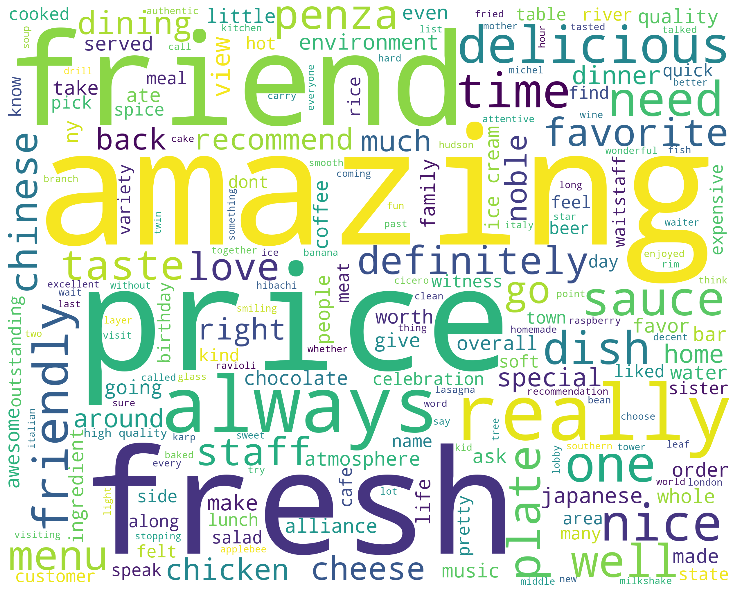

In [249]:
# positive wordcloud
print("Words used in Positive reviews")
wordcloud_draw(dfsenPos.review,'white')

Words used in Negative reviews


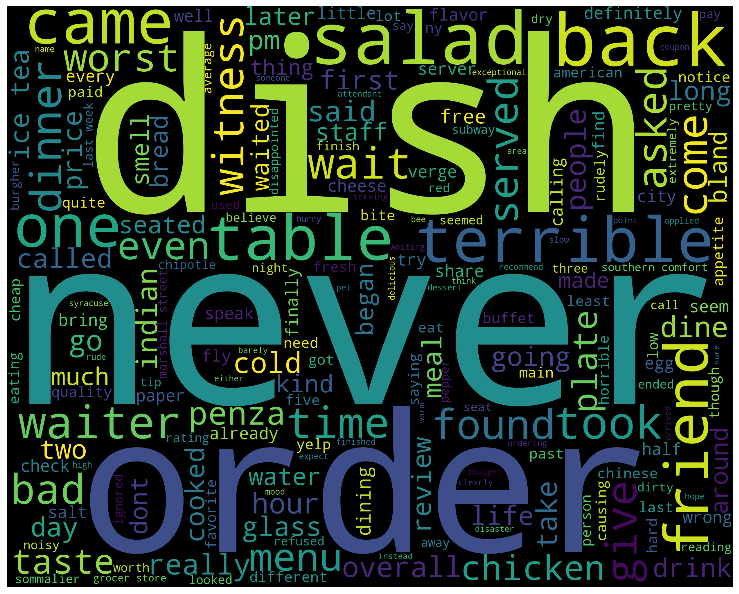

In [250]:
# negative wordcloud
print("Words used in Negative reviews")
wordcloud_draw(dfsenNeg.review,'black')

In [251]:
##Computing a compund sentiment 
tf1['finalsentiment'] = tf1['words'].apply(lambda x: TextBlob(x).sentiment[0] )
tf1[['words','finalsentiment']].head()

,words,finalsentiment
52,friend,0.0
12,dish,0.0
49,one,0.0
78,time,0.0
97,order,0.0


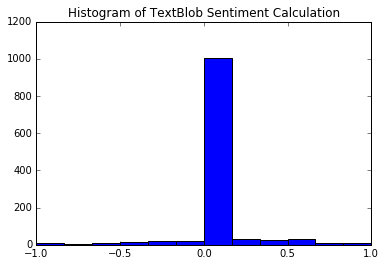

In [252]:
plt.hist(tf1.finalsentiment, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram of TextBlob Sentiment Calculation")
plt.show()

In [253]:
tf1pos = tf1[tf1['finalsentiment']>0]
tf1neg = tf1[tf1['finalsentiment']<0]
tf1neu = tf1[tf1['finalsentiment']==0]

Positive Words


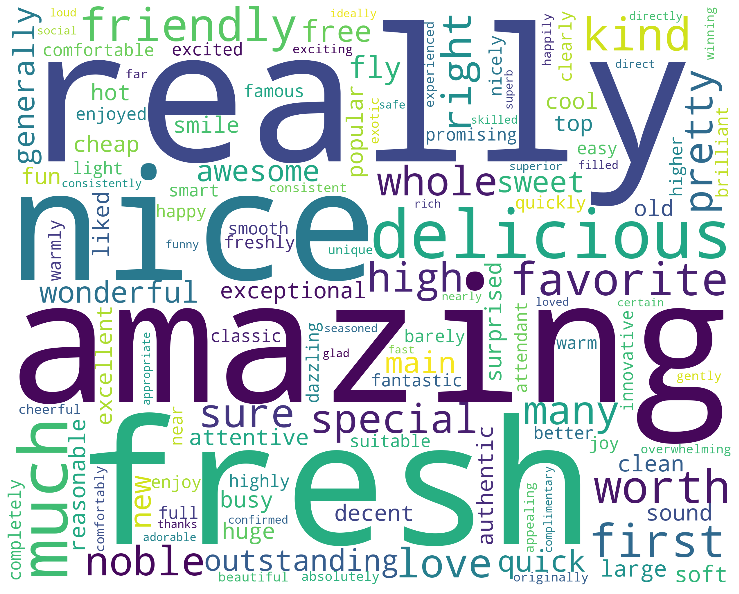

In [254]:
# positive wordcloud
print("Positive Words")
wordcloud_draw(tf1pos.words,'white')

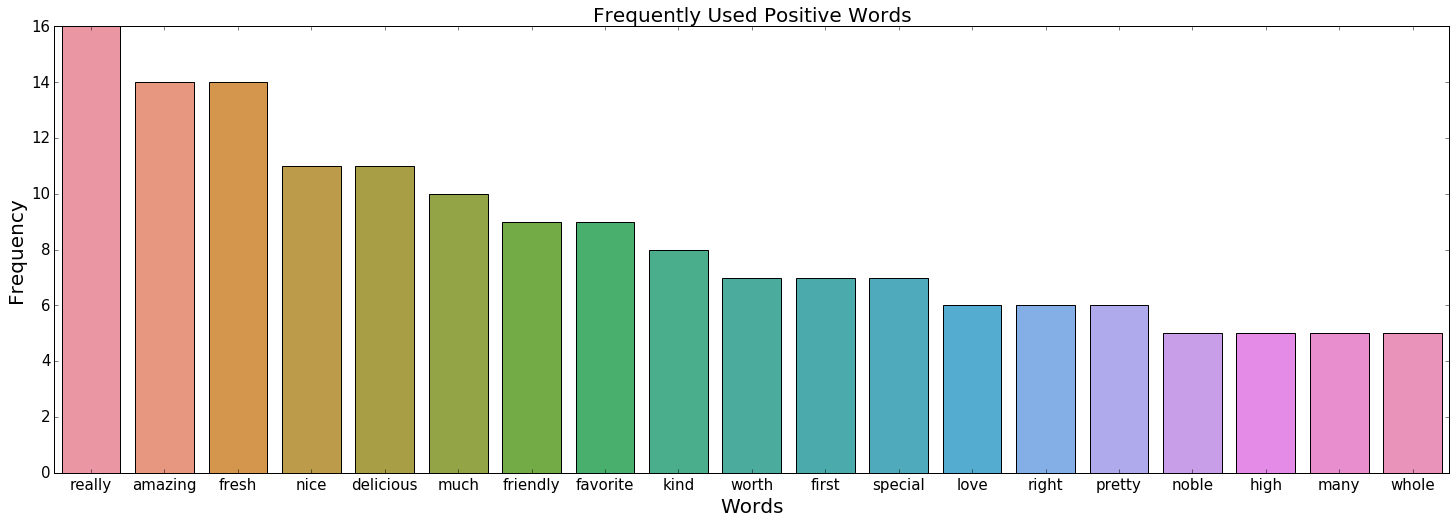

In [255]:
tf1postops = tf1pos[tf1pos['tf'] >=5]
plt.figure(figsize=(25,8))
c=sns.barplot(x='words',y='tf',data=tf1postops)
c.axes.set_title("Frequently Used Positive Words",fontsize=20)
c.set_xlabel("Words",fontsize=20)
c.set_ylabel("Frequency",fontsize=20)
c.tick_params(labelsize=15)

Negative Words


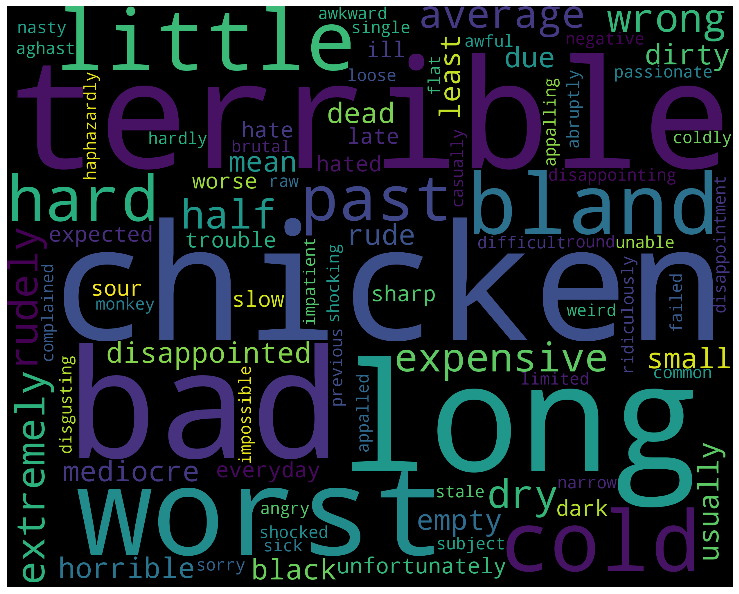

In [256]:
# negative wordcloud
print("Negative Words")
wordcloud_draw(tf1neg.words,'black')

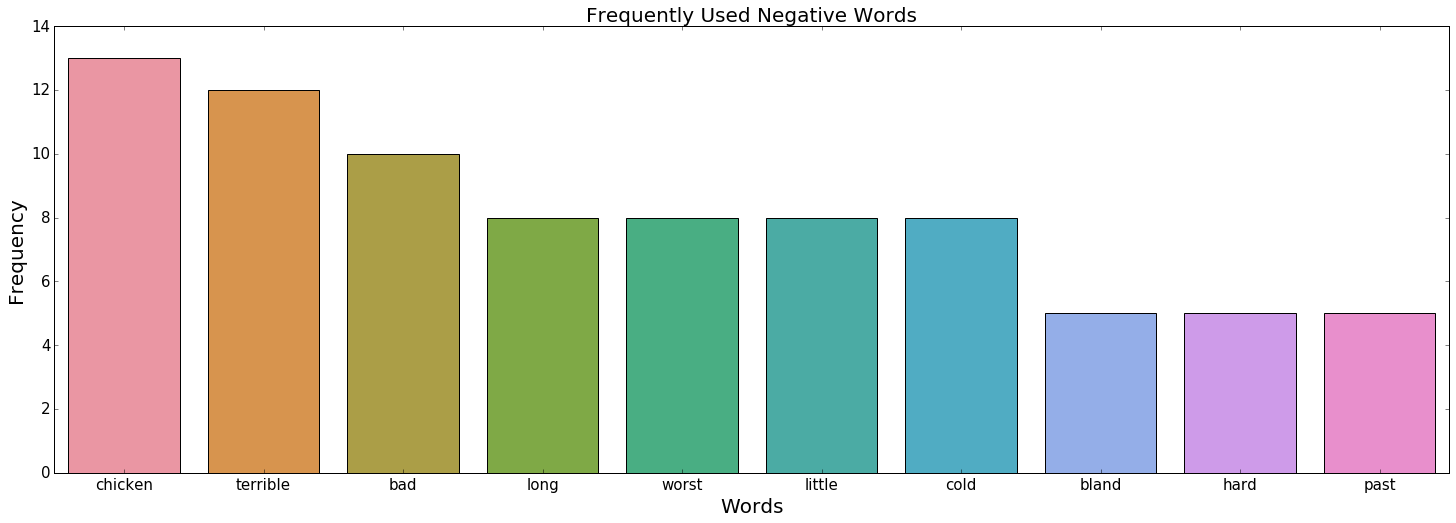

In [257]:
tf1negtops = tf1neg[tf1neg['tf'] >=5]
plt.figure(figsize=(25,8))
d=sns.barplot(x='words',y='tf',data=tf1negtops)
d.axes.set_title("Frequently Used Negative Words",fontsize=20)
d.set_xlabel("Words",fontsize=20)
d.set_ylabel("Frequency",fontsize=20)
d.tick_params(labelsize=15)

Neutral Words


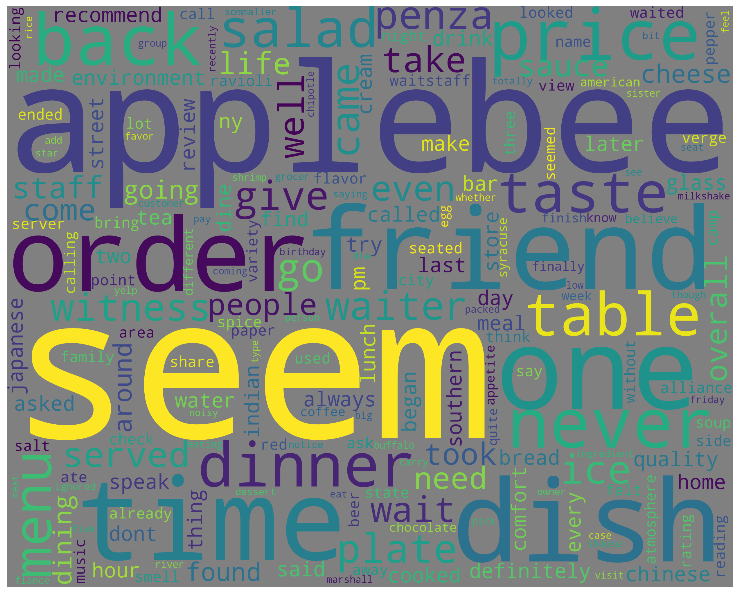

In [258]:
# neutral wordcloud
print("Neutral Words")
wordcloud_draw(tf1neu.words,'grey')

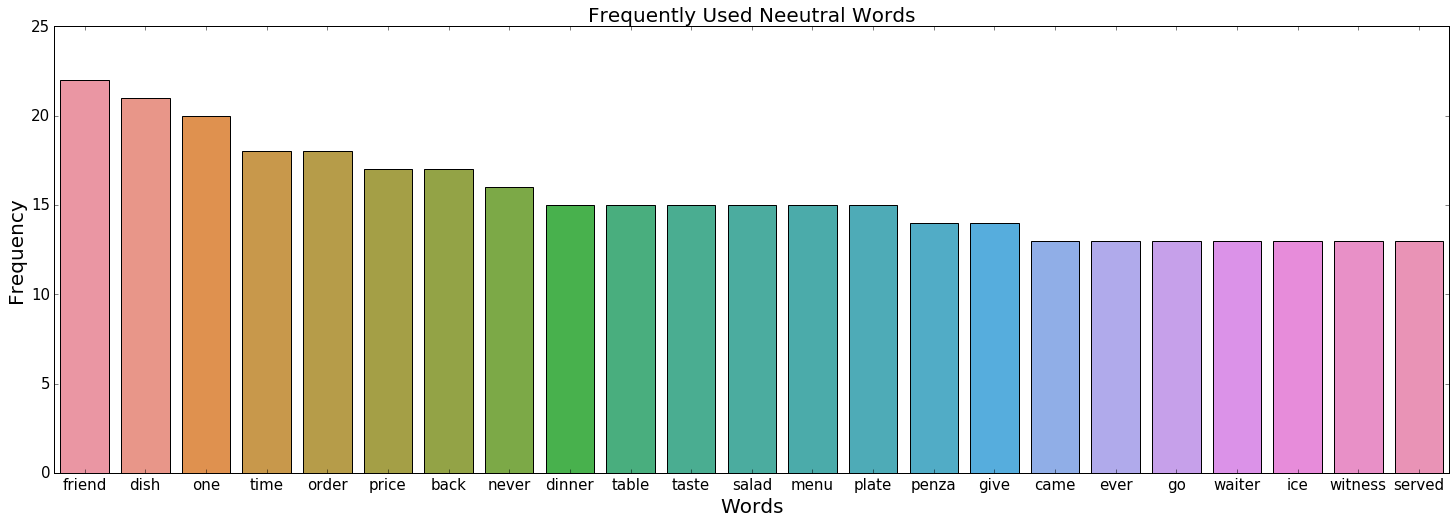

In [259]:
tf1neutops = tf1neu[tf1neu['tf'] >=13]
plt.figure(figsize=(25,8))
e=sns.barplot(x='words',y='tf',data=tf1neutops)
e.axes.set_title("Frequently Used Neutral Words",fontsize=20)
e.set_xlabel("Words",fontsize=20)
e.set_ylabel("Frequency",fontsize=20)
e.tick_params(labelsize=15)

In [260]:
from sklearn.metrics import adjusted_rand_score

In [261]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(dfsenpred.review)

true_k = 4
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")



Top terms per cluster:
Cluster 0:
 nice
 speak
 dining
 environment
 penza
 ate
 friend
 liked
 time
 quality
Cluster 1:
 dinner
 come
 time
 wait
 served
 table
 indian
 dish
 water
 staff
Cluster 2:
 plate
 came
 terrible
 salad
 menu
 order
 area
 dish
 definitely
 witness
Cluster 3:
 ice
 cream
 try
 fly
 delicious
 chocolate
 bread
 tea
 beer
 bad




In [262]:
from sklearn.feature_extraction.text import CountVectorizer
# Fit the CountVectorizer to the training data
vect = CountVectorizer().fit(dfsenpred.review)

In [263]:
# transform the documents in the training data to a document-term matrix
wordsvectorized = vect.transform(dfsenpred.review)

In [264]:
wordsvectorized

<91x1196 sparse matrix of type '<class 'numpy.int64'>'
	with 2558 stored elements in Compressed Sparse Row format>

In [265]:
vectdf = pd.DataFrame(wordsvectorized.toarray())

In [266]:
vectdf.head()

,0,1,2,3,4,5,6,7,8,9,...,1186,1187,1188,1189,1190,1191,1192,1193,1194,1195
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Figure size 1800x1800 with 0 Axes>

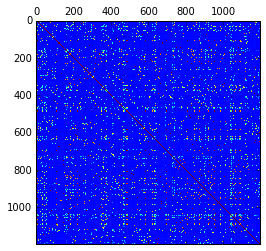

In [267]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,25))
plt.matshow(vectdf.corr())
plt.show()